Name: **Megha Dandapat**<br>
Div: **BE10**<br>
Roll no: **43217**<br>
Title: **Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow**<br>

In [10]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
print("[INFO] accessing MNIST...")

[INFO] accessing MNIST...


In [13]:
((trainX, trainY), (testX, testY)) = mnist.load_data() 

In [14]:
trainX.shape

(60000, 28, 28)

In [16]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1)) 
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [17]:
trainX = trainX.astype("float32") / 255.0 
testX = testX.astype("float32") / 255.0

In [19]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [20]:
#building the model
model.add(Dense(256, input_shape=(784,), activation="relu")) 
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [21]:
Adam = Adam(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=Adam,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 4ms/step - loss: 0.3495 - accuracy: 0.8967 - val_loss: 0.1747 - val_accuracy: 0.9525
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1584 - accuracy: 0.9565 - val_loss: 0.1623 - val_accuracy: 0.9569
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9684 - val_loss: 0.1252 - val_accuracy: 0.9657
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1001 - accuracy: 0.9722 - val_loss: 0.1320 - val_accuracy: 0.9664
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9744 - val_loss: 0.1158 - val_accuracy: 0.9677
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9760 - val_loss: 0.1704 - val_accuracy: 0.9497
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9779 - val_loss: 0.1046 - val_accuracy: 0.9737

Epoch 58/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.1386 - val_accuracy: 0.9737
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9901 - val_loss: 0.1354 - val_accuracy: 0.9740
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.1277 - val_accuracy: 0.9731
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.1466 - val_accuracy: 0.9713
Epoch 62/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9885 - val_loss: 0.1301 - val_accuracy: 0.9721
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9891 - val_loss: 0.1647 - val_accuracy: 0.9729
Epoch 64/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9914 - val_loss: 0.1381 - val_accuracy:

In [22]:
#making the predictions
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.94      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



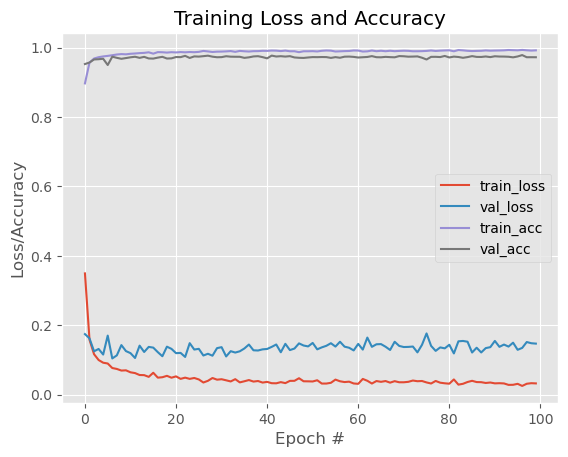

In [23]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()